# Fruit and Veggie price analysis

## Data Source
The data comes from the USDA Economic Eesearch Service estimates of average costs of fruits and vegetables. The datasets can be found on the [USDA website](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices).

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Importing and Exploring the Datasets

First we will import the two datasets we will be working with. The USDA stores the information for fruit and vegetables seperatley, so we read both datasets into pandas dataframes here.

In [2]:
justFruit = pd.read_csv('Fruit-Prices-2022.csv')
justVeggies = pd.read_csv('Vegetable-Prices-2022.csv')

Then we move to initial exploration into our datasets.

In [3]:
justFruit.head()

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145


In [4]:
justVeggies.head()

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961
1,Artichoke,Fresh,2.4703,per pound,0.3750,0.3858,pounds,2.5415
2,Artichoke,Canned,3.4498,per pound,0.6500,0.3858,pounds,2.0476
3,Asparagus,Fresh,2.9531,per pound,0.4938,0.3968,pounds,2.3731
4,Asparagus,Canned,3.4328,per pound,0.6500,0.3968,pounds,2.0958


We can see our datasets for both fruits and vegetables contain the same information for each entry, which will make working with and comparing the two datsets easy for us. We have the name, form, price, and price unit for each item. Yield means the proportion of the item that is edible, for example: apples have an inedible core and so the yield is less than 1 (0.9), whereas there is no part of applesauce that is inedible so it is assigned a yield of 1. CupEquivalentSize and CupEquivalentUnit together tell us how much of a food item it takes to make a cup, and the CupEquivalentPrice is the price for that cup. This is especially useful because the retail price is determined by different things for each item (pounds, pints, etc.), so a cup equivalent price gives us a standard unit to compare between items.

## Data Shaping

Since our two tables contain all the same information it will be useful to combine them into a larger dataframe. That being said, it is stil useful to know if an item is classified as a fruit or a vegetable, so we add this column here as well as rename the fruit column in preperation for merging.

In [5]:
renamedFruit = justFruit.rename(columns={'Fruit':'Name'}, inplace=False)
renamedFruit['Type'] = 'Fruit'
renamedFruit.head()

,Name,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Type
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996,Fruit
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323,Fruit
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349,Fruit
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043,Fruit
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145,Fruit


In [6]:
renamedVeggies = justVeggies.rename(columns={'Vegetable':'Name'}, inplace=False)
renamedVeggies['Type'] = 'Vegetable'
renamedVeggies.head()

,Name,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Type
0,Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961,Vegetable
1,Artichoke,Fresh,2.4703,per pound,0.3750,0.3858,pounds,2.5415,Vegetable
2,Artichoke,Canned,3.4498,per pound,0.6500,0.3858,pounds,2.0476,Vegetable
3,Asparagus,Fresh,2.9531,per pound,0.4938,0.3968,pounds,2.3731,Vegetable
4,Asparagus,Canned,3.4328,per pound,0.6500,0.3968,pounds,2.0958,Vegetable


Now the data is prepared to merge into a larger dataframe.

In [7]:
allPriceData = pd.merge(renamedFruit,renamedVeggies, how='outer')
allPriceData.head()

,Name,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Type
0,Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961,Vegetable
1,Apples,Fresh,1.8541,per pound,0.9000,0.2425,pounds,0.4996,Fruit
2,"Apples, applesauce",Canned,1.1705,per pound,1.0000,0.5401,pounds,0.6323,Fruit
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.0000,8.0000,fluid ounces,0.3043,Fruit
4,"Apples, ready-to-drink",Juice,0.8699,per pint,1.0000,8.0000,fluid ounces,0.4349,Fruit


## Basic Plots

Now we can use some basic plots to get some ideas about what the data tells us.

### Fruits vs. Vegetables

<Axes: xlabel='Type'>

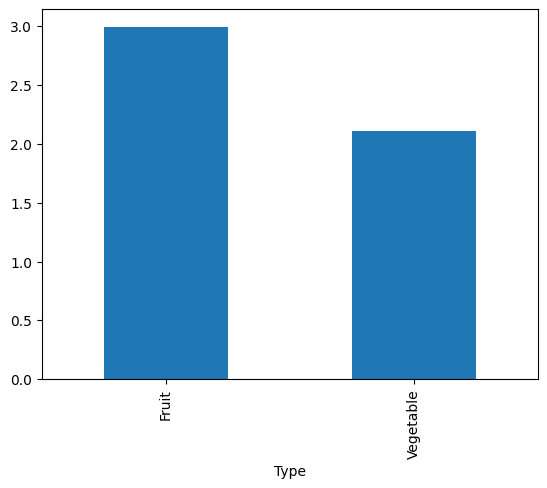

In [8]:
bar1 = allPriceData.groupby(['Type'])['RetailPrice'].mean()
bar1.plot.bar()

### Representaion of Each Type

<Axes: xlabel='Form'>

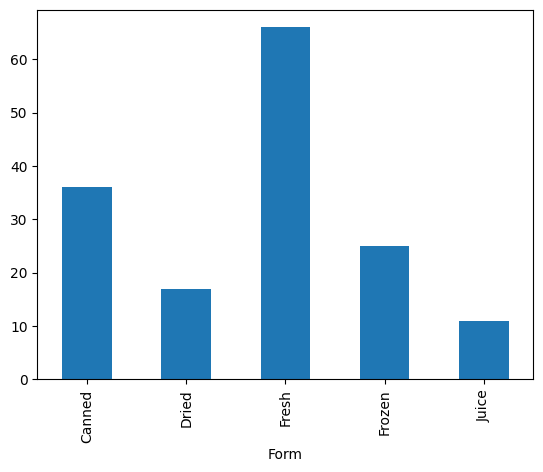

In [9]:
allPriceData.groupby(['Form'])['Type'].count().plot.bar()

### Retail Price by Type

In [10]:
bar2 = allPriceData.groupby(['Form'])['RetailPrice'].mean()
pd.Series.sort_values(bar2, ascending=False ,inplace=True)
bar2

Form
Dried     4.428729
Frozen    2.873968
Fresh     2.350041
Canned    1.840772
Juice     1.199436
Name: RetailPrice, dtype: float64

### Cup Price by Type

<Axes: xlabel='Form'>

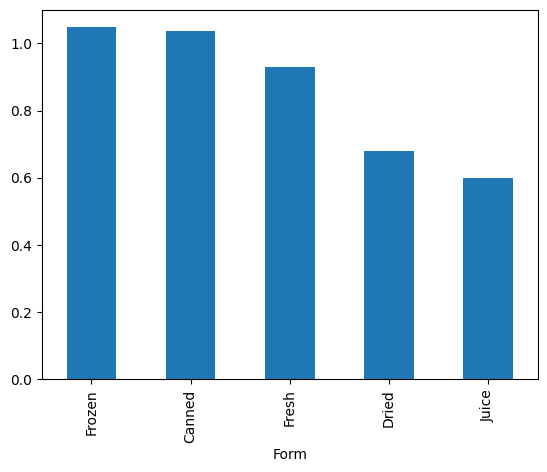

In [11]:
bar3 = allPriceData.groupby(['Form'])['CupEquivalentPrice'].mean()
pd.Series.sort_values(bar3, ascending=False ,inplace=True)
bar3.plot.bar()

In [12]:
allPriceData.groupby(['Type','Form'])['Name'].count()

Type       Form  
Fruit      Canned    12
           Dried      9
           Fresh     24
           Frozen     6
           Juice     11
Vegetable  Canned    24
           Dried      8
           Fresh     42
           Frozen    19
Name: Name, dtype: int64